In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='c7a25498560dd41ca027175c3afa4f4315b5fca7e8ac74883ecbd5050fa86ae096e0cea19cbab3fb56a3830506b5cea009bcc0f45139532903f0611942b98f2d'
)


In [2]:
from qiskit import QuantumCircuit
 
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl",style="iqp")
from qiskit.quantum_info import Pauli
 
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
 
service = QiskitRuntimeService()
 
# Run on the least-busy backend you have access to
backend = service.least_busy(simulator=False, operational=True)
 
options = Options()
options.resilience_level = 1
options.optimization_level = 3
 
# Create an Estimator object
estimator = Estimator(backend, options=options)
 
# Submit the circuit to Estimator
job = estimator.run(circuits=[qc]*6, observables=[IZ, IX, ZI, XI, ZZ, XX], shots = 5000)
 
# Once the job is complete, get the result
job.result()

runtime_job._start_websocket_client:WARNING:2023-11-30 15:56:24,680: An error occurred while streaming results from the server for job cnm37ad7aw9g008gjshg:
Traceback (most recent call last):
  File "/home/oem/.local/lib/python3.8/site-packages/qiskit_ibm_runtime/runtime_job.py", line 531, in _start_websocket_client
    self._ws_client.job_results()
  File "/home/oem/.local/lib/python3.8/site-packages/qiskit_ibm_provider/api/clients/runtime_ws.py", line 70, in job_results
    self.stream(url=url, retries=max_retries, backoff_factor=backoff_factor)
  File "/home/oem/.local/lib/python3.8/site-packages/qiskit_ibm_provider/api/clients/base.py", line 230, in stream
    raise WebsocketError(error_message)
qiskit_ibm_provider.api.exceptions.WebsocketError: 'Max retries exceeded: Failed to establish a websocket connection. Error: Traceback (most recent call last):\n  File "/home/oem/.local/lib/python3.8/site-packages/websocket/_app.py", line 434, in setSock\n    dispatcher.read(self.sock.sock,

EstimatorResult(values=array([ 0.0131842 ,  0.02354322, -0.00878037,  0.09307191,  1.21104885,
        1.05564329]), metadata=[{'variance': 5.560408298673796, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 5.560027838762645, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 4.833784219428105, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 4.82519893358575, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 0.9369168238969159, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 're

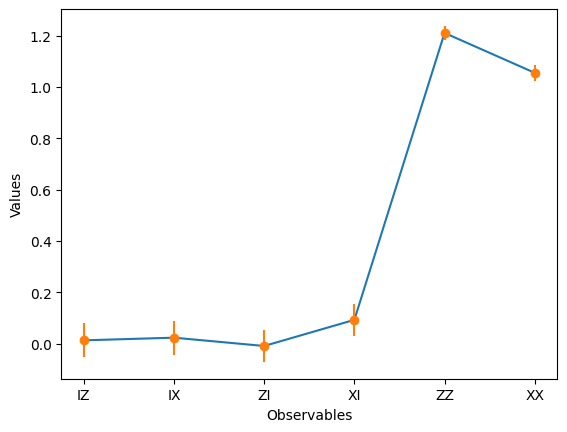

{'quantum_seconds': 26.468321087779735}


In [5]:
import matplotlib.pyplot as plt
import numpy as np
 
# data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result().values
 
# creating error bars
error = []
for case in job.result().metadata:
    error.append(2*np.sqrt(case['variance']/case['shots']))
 
# plotting graph
plt.plot(data, values)
plt.errorbar(data, values, yerr = error, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()
print(job.usage_estimation)